# Neural Networks for Hand Digit Recognition

Notes and code were adapted from: http://neuralnetworksanddeeplearning.com

## Logical Operations

We can show the ANN's are capabile of running logical operations.

<img src="../../../../assets/1-supervised-learning/ann-logical-ops.png" style="width: 750px;"/>

If we make the assumption that nueron C is only true when there are two or more incoming signals that are true, then ...
1. C=A is the identify function because when A fires or does not fire, C will do the same.
2. Since C requires both A and B to be active, so if either is of, it will not fire.
3. A can fire, or B can fire, or both can fire independently. The result would be C firing since A and B both stem two signals each.
4. C will fire only if A and B does not fire. Suppose A fires and B fires. Then we have 2-1 = 1 total signals since B degates a signal. Suppose A fires and B does not fires. Then we 3 total total signals, resulting in C firing. 

This is important because it tells us that any kind of gate can be built with a perceptron, including NAND gates, which are universal for computation.

## Architecture Foundations

### TLU - Threshold Logical Unit

The neuron itself can be thought of as a number (between 0 and 1 if it a sigmoid neuron) that comes from the sum of the previous neurons multiplied connected weight plus some bias. It is structured in such in order to describe how important an input is. The TLU provides this foundation for neural networks.

The TLU takes in a series of variables and weights as numbers and outputs an either on or off value. Mathematically, the TLU will compute a weighted sum of its inputs ($z = w_1x_1 + w_2x_2 + \dots + w_nx_n = x^Tw$), and then applies a step function on top of that sum to produce a 1 or 0.

$$h_w(x) = step(z), \text{ where } z = x^Tw$$

<img src="../../../../assets/1-supervised-learning/tlu.png" style="width: 750px; margin:auto 0;display: block;"/>

The typical step function will activate the signal if the weights of its inputs are >=0. Look at this unit a bit more closely, it behaves identically to a linear logistic classifier or a linear regressor. That is, it takes a vecotr row or input x, followed by a respected weight vector, and then thresholds the weighted sum of this inputs to produce a binary classification: zero or one.


\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } \sum_j w_j x_j \leq \mbox{ threshold} \\
      1 & \mbox{if } \sum_j w_j x_j > \mbox{ threshold}
      \end{array} \right.
\end{eqnarray}

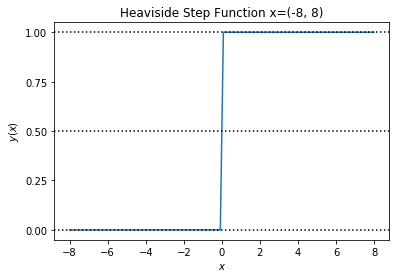

In [4]:
%matplotlib inline
from mltoolbox.draw.math import heaviside

heaviside()

For example, a single TLU can be used to classify iris flowers based off petal length. The training process here would be to identify the  optimal weight vector that minimizes the overall error in our training samples.

We can rewrite the single binary output of the function, $h_w(x) = step(x^Tw)$ equivalently as.

\begin{equation}
   [1|0]
    =
    \text{step} \left(
    \begin{bmatrix}
        x_{11} x_{12} x_{13} \dots x_{1n}
    \end{bmatrix}
    %
    \begin{bmatrix}
        w_{11} \\ 
        w_{21} \\ 
        w_{31} \\ 
        \dots \\ 
        w_{n1}
    \end{bmatrix}
    \right)
\end{equation}

* $x$ is a single row input, with $n$ different dimensions.
* $w$ is an learned weight vector that is also $n$ dimensional to respectfully match each feature in $x$
* The output is a a number 1, 0 single it was filtered through the step function.

For example.

In [5]:
import numpy as np


def step(x):
    return int(x >= 0)
step(np.array([1,2,3])@np.array([1,2,3]).T)

1

### Sigmoid Activation Function

Similiar to the step function, there is a more commonly used activation function that outputs a real number rather than a binary, "fire or not" kind of signal.

A neural network learns in the process of small changes to weights, that incrementally reduce the the output error. However, some small changes can cause a cascading effect on other artificial neurons, including output neurons to flip from 0 to 1. This is where the sigmoid neuron comes in. Sigmoid neurons translate our output that is 0 and 1 to a real number between 0 and 1. Rather than getting a discrete value between 0 and 1, now we can infer the notable degree of change. So now whereas a perceptron that does not fire will have no effect, the equivalent sigmoid neuron will have an unnotiably small effect ($\approx 0$). In effect, the sigmoid activiation function is a smoothed version of the perceptron step function.

\begin{eqnarray} 
  \sigma(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+\exp(-\sum_j w_j x_j-b)}
\end{eqnarray}

In summary, the smoothness of the sigmoid functions allows us how small changes in $w$ will always have small changes in the output. According to the partial derivative, these changes are linear to $w$ and the bias $b$. More onto this later, but this means that during the training process, the weights are able to get nudged in the direction most meaningful to them.

There are other alternatives to the sigmoid function, such as relu for example - which is often used in deep neural networks.

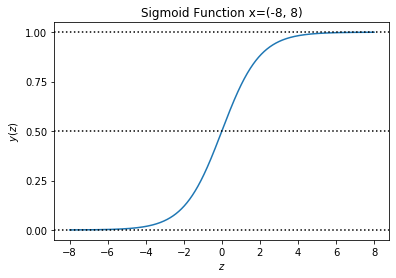

In [6]:
from mltoolbox.draw.math import sigmoid

sigmoid()

### Perceptron

The perceptron is a just a single layer of TLU's, where each input is connected to each TLU. When this kind of thing happens, its called a fully connected layer. That fully connected layer in our case would be the layer of TLU's.

<img src="../../../../assets/1-supervised-learning/perceptron.png" style="width: 750px; margin:auto 0;display: block;"/>

The input neurons in our cases are provided as illustration to demonstrate the fact that its preceeding layer is fully connected. Input neurons just pass through what they are provided. In addition to the input layer is typically an additional bias term. It is useful to have because it offsets the starting position of the regressor.

In the case above, this perceptron takes a single input and outputs 3 different binary classes. So this on it's own can functions as a multilabel classifier. The output from the fully connected layer can be computed efficiently using linear algebra.

$$h_{\mathbf{W}, \mathbf{b}}(\mathbf{X})=\phi(\mathbf{X W}+\mathbf{b})$$

One question I had from before was, "What are all those arrows signifing? What do they actually mean?". The answer to that is that they are just resembing linear algebra operations. The equation above summarizes it all. It can be rewritten below as follows as well.

\begin{equation}
    \begin{bmatrix}
        h_{11} & h_{12} & h_{13} & \dots  & h_{1k} \\
        h_{21} & h_{22} & h_{23} & \dots  & h_{2k} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        h_{m1} & h_{m2} & h_{m3} & \dots  & h_{mk}
    \end{bmatrix}
    =
    \phi \left(
    \begin{bmatrix}
        x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
        x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
    \end{bmatrix}
    %
    \begin{bmatrix}
        w_{11} & w_{12} & w_{13} & \dots  & w_{1k} \\
        w_{21} & w_{22} & w_{23} & \dots  & w_{2k} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        w_{n1} & w_{n2} & w_{n3} & \dots  & w_{nk}
    \end{bmatrix}
    +
    \begin{bmatrix}
        b_{11} \\
        b_{21} \\
        \vdots \\
        b_{n1}
    \end{bmatrix}
    \right)
\end{equation}

* $m$ = number of instances
* $n$ = number of features
* $k$ = number of artificial nuerons (see output layer = 3)


Previously we had a single TLU take in the input for a single instance and weight vector. Within a perceptron, we have a string of TLU's - but each TLU is operating the same way as before: it takes the weighted input from each of the input nuerons. In addition, rather than taking a single instance, we are now dealing with all the instances in the matrix. So the output itself is a matrix. It contains the output row for each instance passed in. And for each row, the output would be either vector of 1, and 0's: the output from each artificial neuron.

Mocking an real example using the example image perceptron above, we can do something like:

In [7]:
# (mxk) = (mxn) x (nxk) + (nx1)
# n=2 features (not including bia)
# m=4 examples (arbitrary)
# k=3 nuerons (arbitrary, and includes bias)

#                                                     1 weight vector extends each            
#                                                     feature (including the bias==3) 
# 4 examples with 2 features                          to the output layer (==3)                    
# |---------------- examples -------------------------|----------------- weights ------------------|-------- bias --------|
np.matrix([[1, 1, 2], [1, 3, 4], [1, 3, 4], [1, 3, 4]])@np.matrix([[4, 5, 6], [6, 7, 8], [6, 7, 8]])

matrix([[22, 26, 30],
        [46, 54, 62],
        [46, 54, 62],
        [46, 54, 62]])

Notice how we had `[1, 3, 4]` both as duplicate instances, and the matrix operations produce the same results here. The bias vector was merged along with in the input layer.

We can also simplify to show this operates with a single instance. The equation $h_{\mathbf{W}, \mathbf{b}}(\mathbf{X})=\phi(\mathbf{X W}+\mathbf{b})$ remains the same. But its expansion is reinterpreted.


\begin{equation}
    \begin{bmatrix}
        h_{11} & h_{12} & h_{13} & \dots  & h_{1k}
    \end{bmatrix}
    =
    \phi \left(
    \begin{bmatrix}
        x_{11} & x_{12} & x_{13} & \dots  & x_{1n}
    \end{bmatrix}
    %
    \begin{bmatrix}
        w_{11} & w_{12} & w_{13} & \dots  & w_{1k} \\
        w_{21} & w_{22} & w_{23} & \dots  & w_{2k} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        w_{n1} & w_{n2} & w_{n3} & \dots  & w_{nk}
    \end{bmatrix}
    +
    \begin{bmatrix}
        b_{11} \\
    \end{bmatrix}
    \right)
\end{equation}

Notice how the weight matrix stays the same. It define the architecture of the perceptron itself. Additionally, the output to that instance remained the same.

In [8]:
np.matrix([[1, 1, 2]])@np.matrix([[4, 5, 6], [6, 7, 8], [6, 7, 8]])

matrix([[22, 26, 30]])

A good question is: why do we need many artificial neurons? Why isn't a single TLU enough? The answer to that question to that is so we can encode many more different things. The output could serve as an interpreter for a multilabeled output. For example, we many want to encode an output of `[1, 0, 0]`, or even something more complex like an image where each out in the matrix array output a pixel intensity value of that image.

For more clarity, we'll describe each variable and their significance more closely.

* $X$ is a $m \text{ x } n$ the input matrix. It contains $m$ rows for each sample, each containing $n$ features.
* $W$ is the weight matrix that represents all the learned weights. There is a learned weight vector for each input neuron, with exception to the bias neuron, and a column for every artificial neuron. Hence, in the image example above, the weight is $2 \text{ x } 3$, with 2 rows for each feature and 3 columns for each artificial neuron. 
* $b$ is the bias vector that contains all the weights from the bias neuron to the artificial neuron. The bias vector is nearly identical to a weight vector. We are just artificially putting in bias neuron because we want to leverage additional control.
* $\phi$ is the activiation function is intend to be agnostic to many different types. For example, previously we learned about the step function.

The most important thing to understand with the perceptron is that it is just adds more TLUs. In the perceptron image example, suppose were we to take out two artificial nuerons in the output layer. The result would be a TLU, and we know that a TLU fundamentally operates by weighting features and summing them to produce a single number. Now add another artifical neuron here, and give it a different set of weights. The only difference here would be that the output would be different only if the weights were different (hence the importantance of initially randomizing the weights, but more on that later).

Ultimately, the artificial neurons operate independently. So wrapping it up in a bigger picture, we can think of the artificial neurons of have their own character or interpretative ability on some inputs.

#### Training

Training a perception is inspired by Hebb's rule: "neurons that fire together wire together". Mathematically, this transates to, when two neurons have the same output, the weight between the two neurons should be increased to signify their relationship. Perceptrons will train on this central idea, by strengthing or increasing the weights between other neuron connections that help reduce the overall training error. The learning rule is summarized below:

$$w_{i, j}^{(\text { next step })}=w_{i, j}+\eta\left(y_{j}-\widehat{y}_{j}\right) x_{i}$$


Lets break this equation down:

* $w_{i,j}$ is the index i, j in the weight matrix. Visually, this is the connection weight between the ith input neuron and the jth output neuron.
* $x_i$ is the ith training instance.
* $\hat{y_j}$ is output of the jth output neuron (for the ith training instance).
* $y_j$ is the target (true) output for the jth output nueron (for the ith training instance).
* $\eta$ is the learning rate.

In english this say that the weight between input neuron i and output neuron j is changes proportional the to difference between the true and expected output j for a particular training instance.

The decision boundary for a perceptron is linear, and we can demonstrate this with sklearn.

In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)  # Iris Setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

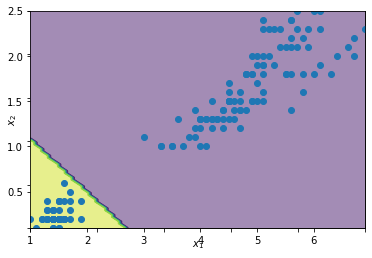

In [11]:
from mltoolbox.draw.classification import plot_2d_decision_boundary_supervised


plot_2d_decision_boundary_supervised([per_clf], X, y, 100, 100)

Perceptrons are actually equivalent to `SGDClassifier` with `loss="perceptron", learning_rate="constant", eta0=1` (the learning rate), and` penalty=None` (no regularization). But unlike logistic classifiers, perceptons do not produce class probabilities. Instead, they will hard classify simplify based off the step function.

One of the hard limitations of perceptons where the inability to classify xor type problem due to the linear decision boundaries. For example, we cannot draw a decision boundary through the following truth table.

In [13]:
import pandas as pd

pd.DataFrame([[1, 0, 1], [0, 0, 0], [0, 1, 1], [1, 1, 0]], columns=['a', 'b', 'a ^ b'])

,a,b,a ^ b
0,1,0,1
1,0,0,0
2,0,1,1
3,1,1,0


Text(0.5, 1.0, 'Trying Linearly Seperating These')

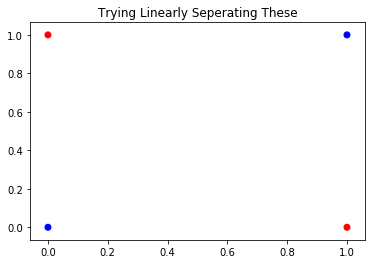

In [34]:
import matplotlib.pyplot as plt

X, y, color = [1,0,0,1], [0,0,1,1], ['r', 'b', 'r', 'b']
plt.scatter(x=X, y=y, color=color)
plt.title('Trying Linearly Seperating These')

In [35]:
X, y = np.c_[np.array(X).T, np.array(y).T], [1, 0, 1, 0]
per_clf = Perceptron()
per_clf.fit(X, y)
per_clf.predict(X)

array([0, 0, 0, 0])

### Multilayer Perceptrons

This limitation can be lifted if you stack perceptrons. The creation of this new nueral network architecture is Multilayer Percepton. MLP's are one example of feed forward neural networks or FNN.

<img src="../../../../assets/1-supervised-learning/mlp.png" style="width: 750px; margin:auto 0;display: block;"/>

In [37]:
from sklearn.neural_network import MLPClassifier


mlp_clf = MLPClassifier()
mlp_clf.fit(X, y)
mlp_clf.predict(X)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



array([1, 0, 1, 0])

Text(0.5, 1.0, 'The MLP is able to Solve the XOR Problem')

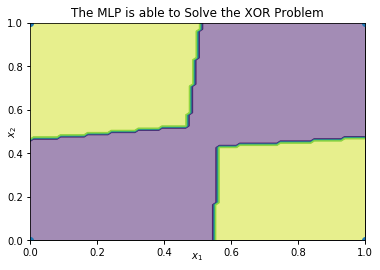

In [40]:
plot_2d_decision_boundary_supervised([mlp_clf], X, y, 100, 100)
plt.title('The MLP is able to Solve the XOR Problem')

In general, when any form of artificial neural network contains many hidden layers, we obtain a deep neural netwrok or DNN. 

#### Training

Perceptrons could be trained using the same learning dynammics from a single TLU. And a single TLU bases its foundations from basic linear or logistic regression.

In MLP, there are several layers and it was difficult to understand how the weights could be cross communicated throughout the network during training. Backpropagation was introduced a way to solve this problem.

##### The BackPropagation Algorithm

Lets first walk through how the algorithm intuitively works.


**Forward Pass**
1. Your neural network architecture is constructed and initialized with random weights between 0 and 1. As discussed before the random weight initialization is done to promote diversity in the training process between artificial neurons.
2. A batch of inputs pass through the network (say 32). When all the instances pass through the network, 1 epoch is passed. The network runs through 1 or more epoches in batch mode.
3. The 32 instances are passed as a matrix through the networks input layer (which are pass through, so it sends these off the the first hidden layer.) The first hidden layer will then compute the outputs using its associated weights for all the instances in the mini batch. This process is repeated from layer to layer until the output is obtained in the final layer.

Note: during this step, all intermediate results are preserved since they are needed for the backward pass.

**Backward Pass**
4. First the error is measure using some metric or loss function that compares what the nueral network go, and what the desired output should be. This to, is done for all 32 instances.
5. Next, each output neuron computes how much it contributed to the error by applying the chain rule. Recall that a neural network will feed the input of one neuron to the next. Mathamatically, we can summarize these process as one giant composite function. The chain rule operates composite functions as follows:

$$\frac{d}{d x}[f(g(x))]=f^{\prime}(g(x)) g^{\prime}(x)$$


6. The algorithm then

The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule—and so on until the algorithm reaches the input layer. As we explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).

Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

# Fit in these notes in somewhere:

* The number of trainable parameters scales proportionally with the size of the layers. For example, if one layer has 300 neurons and the next layers has 500 nuerons, then the total number of trainable parameters between just these two layers is 300 * 500 = 150000 weights. While this provides the network the flexibility to fit the training data, it also provides a big opportunity to over fit the training data simply due to the number of tunable parameters that almost morph in a kind of state machine for the network. This also explains why neural network require a lot of training data to be performant.


### The Architecture of Neural Networks



* An example of a multi-layer feed forward neural network.

![basic neural network](../assets/figures/nn.png)

* The activations of one layer influence the activations in another layer.
* There are not a few rules of thumb to follow for the design of hidden layers, but there some design heuristics to follow that can help others achieve the desired results from their nets.
* Another neural architecture is called a recurrent neural network. In a recurrent neural network, neurons obtain a limited time to fire before entering an inactive state. This potentially causes other neurons to fire, which eventually reach in active state. Over time this causes a cascading of neurons to fire, which is more akin to how our own brains work.

#### Properties

* A perception combined to a set of other layer of perceptrons is actually the definition of a linear regressor. So a neural network is generalizes a linear regressor. So what makes a nueral network achieve non-linear optimization? Adding more layers just adds another layer of linear combinations, and does not make this difference. What does make this difference is adding a non linear term, (such as relu or sigmoid) since these are both non-linear aggregators. Of course, adding sigmoid or a relu are not the only option. But the take-away is that if we want to model non-linearity, we'll need a non-linear term, for example $x_1x_2$ which introduces a squared like aggregation of features.
* Neural nets can functions as non-linear classifiers. This means that any classification problem such cannot be fit with function $y=b+w_1x_1 + w_2x_2 + \dots + w_nx_n$. 
* Stack layers of non-linear terms allows neural nets to model deeper and deeper complex relationships.


### A Simple Neural Network to Classify Handwritten Digits

![neural network for character recognition](../assets/figures/nn_digits.png)

* Input layer: for each pixel intensity in a $28*28=784$ flattened pixel image.
* Hidden Layer: will be experimented on.
* Output Layer: characterization of the digit, which we will classify by selecting the maximum value (which can be almost treated as a probability). The justification for 10 particular output neurons is empirical. We can use 4 neurons, which can represent $2^4=16$ things (sufficient to representing 10 objects), but it turns out 10 neurons for the output layer is more effective and it makes more intuitive sense.

### Learning with Gradient Descent

#### Cost Function
* A cost functions helps us quantify the performance of our model. The larger the cost, the larger the error. For our cost function we will use MSE, or mean squared error. When $a = Y(x)$, then error is zero, and when $a >> Y(x)$, the error is significantly large than if $a > Y(x)$. This "punishes" the network a lot more if it performed significantly more than if it than it performs moderately bad.   
* Alternatively, we can quantify loss as the number of misclassified images, but this would make the cost function non-continuous and nondifferentiable. Having a differentiable function make it _easier_ to know what direction and adjustment to the weights to obtain a smaller cost.
* There are however, alternatives to the MSE cost function. However, MSE generally works typically well.
* In just words, the cost function is a measure of how poorly the neural network performed. In our cost function, what we really want it to reflect a higher cost when the network is wrong, and a lower cost when the network is more of less correct.

\begin{eqnarray}  C(w,b) \equiv
  \frac{1}{2n} \sum_x \| y(x) - a\|^2.
\end{eqnarray}

* $w$: all the weights (vector)
* $b$: all the biases (vector)
* $n$: number of training examples
* $x$: training input (28x28 image)
* $a$: output of the network
* $y(x)$ the true output

* Our cost function measures the differences of how close the output was in classifying a particular number. Each number is represented in binary ($[0,1,0,0,0,0,0,0,0]$ represents 2 for example). And the better the network is in getting to as _close_ to those particular set of zeros and ones, the better it performs (as defined by the cost function).

![image](../assets/figures/cost_function_ex.png)

* We consider the average cost (how well the network performed in classifying all the digits, or some subset of them), to determine its overall performance.
* The cost function is parameterized by all the weights and biases the produced its output. For example, if our network has 784, 16, 16, 10 neurons respectfully in the input, hidden layers and output layer, then we would have a total of 13002 parameters to tune.
    * $13002 = (784*16) + (16*16) + (16*10) + (16 + 16 + 10)$
* The values of these 13002 parameters determine what the output and the performance of the network will be over the thousands of training examples. 

#### Gradient Descent
* For the process of optimizing the weights and biases, gradient descent will be used.
* The derivative of a function locates what variable defines the extremum. Partial derivatives help us identify the extremum for with respect to a particular variable, and the gradient identifies the extremum for all the variables defined for that function. In other words, the gradient of a function gives you the direction of steepest descent and it packs together all the information of a partial derivative.
* The partial derivative with respect to $w$ and $b$  $(\frac{\partial C}{\partial w}, \frac{\partial C}{\partial b})$ tells us how quickly the cost function when we change the weight and biases.

* A short review on gradients: 
    * $f(x, y) = x^2+y^2$
    * $\frac{\partial f}{\partial x } = 2x$
    * $\frac{\partial f}{\partial y } = 2y$
    * Together, these two functions as a vector produce what is known as a vector field. A particular value in a vector field will point in the direction of steepest descent. For example, if I am at point $(2,1)$ in the function $f(x,y)$ above, then moving towards the direction $[4, 1]$ will keep me on track for greatest accent. The value $[4,1]$, tells us the magnitude of the steepness in each direction. 
    * It can be shown that moving in the direction of the gradient, the rate at which the function changes is given by the magnitude of that gradient.
* In general the gradient is defined as $\nabla f(x, y) =  [\frac{\partial f}{\partial x }, \frac{\partial f}{\partial y }]$
    * Which packs together the partial derivative with respect to every direction into a vector.
    
\begin{eqnarray} 
  \Delta C \approx \frac{\partial C}{\partial v_1} \Delta v_1 +
  \frac{\partial C}{\partial v_2} \Delta v_2.
\end{eqnarray}

* We defined the partial change with respect to a particular direction as:

\begin{eqnarray} 
  \nabla C \equiv \left( \frac{\partial C}{\partial v_1}, 
  \frac{\partial C}{\partial v_2} \right)^T.
\end{eqnarray}

* Sometimes is feasible to find the minimum of a function through its derivative.
* However, a neural network with many variables to differentiate and billions of weights, it becomes a more difficult matter and calculus will not work. 

The process for gradient descent works as follows:
1. Compute $\nabla C$
2. Move in the direction of $-\nabla C$. This step can be thought of that of having the most immediate effect in decreasing C. 
3. Repeat until minimum is reached.


* We introduce $\eta$ as the learning rate, which is just multiplies the change in $\Delta v$, as to decrease the time spent to descend down the "gradient valley" in the each direction of the variable. 
    * A good $\eta$ small enough not overshoot the minimum and large enough to as to descent down very slowly.


\begin{eqnarray}
  v \rightarrow v' = v -\eta \nabla C.
\end{eqnarray}

* Consider a function of two variables (3D), for step of gradient descent, if we can partially move in the direction towards the minimum of the cost function, we would be getting closer and closer towards reaching our goal. However, one problem is that depending one what random area you begin this descend would influence on what minimum you land in. There is a possibility that the minimum is not the global minimum.
    * In our case, our random choice begin with the random initialization of weights and biases the network initially begins with.
    * If $w$ are our starting weights (a column vector for a single neuron), then $-C(\nabla w)$ will tell how to tune the weights and biases. In particular if the value is negative, then the parameter should be tuned up, and vise-versa. And the relevant magnitudes tell us the degree to which the weights should change. In other words, if for example, $\nabla C(1,1) = [1,3]$ then this tell us that moving in the direction of the second parameter is three times more effective than than in the x parameter.  
    * It is worth noting that many local minimums are of equal quality. In other words, there is a possibility that a many different set of weights produce the degree of $C(w, b)$.
* To combat the problem of finding a local minimum, 


* Taking the gradient of the cost function, we obtain our update rules:

\begin{eqnarray}
  w_k & \rightarrow & w_k' = w_k-\eta \frac{\partial C}{\partial w_k}\\
  b_l & \rightarrow & b_l' = b_l-\eta \frac{\partial C}{\partial b_l}.
\end{eqnarray}

#### Stochastic Gradient Descent

* Stochastic gradient descent is used to speed on computation. Instead of computing the gradient for EVERY training input x in order to make a decision on which step to make, we take a small random sample or "mini-batch" of the training set and average this sample of results. From a randomly sufficient sample, we can get a pretty good estimator. New random samples per update are selected every time.
* So now, averaging over m samples, our equation gets modified to:

\begin{eqnarray}
    w_k & \rightarrow & w_k' = w_k-\frac{\eta}{m}
  \sum_j \frac{\partial C_{X_j}}{\partial w_k} \\
  b_l & \rightarrow & b_l' = b_l-\frac{\eta}{m}
  \sum_j \frac{\partial C_{X_j}}{\partial b_l}
\end{eqnarray}

* One epoch means exhaustively training through all the inputs.
* Sometimes $\frac{1}{n}$ or $\frac{1}{m}$ (the average) is omitted from the equations, when the number of training examples are not known in advance. Conceptually, this works out too, since it is equivalent to just rescaling $\nabla$.

###  Building the Network

#### System Architecture
* Each dense layer is randomly initialized with a weight matrix with values pretty close to zero. This is important to break symetry, since otherwise the each neuron would respond identically to that of its neigbore. The bias nuerons are on the other hand, initialized to zero, or set a custom. Initialization methods can be customarly set by `kernal_initializer` (another word for matrix for connection weights), and `bias_initializer`. 
* The input layer is also treated as as "neuron", but biases are omitted from this layer.
* The entire network can be thought of as a large composite function. Each neuron itself takes in x amount of inputs and splits y amount of outputs, and the same could be said about the entire network.
* The system architecture:

![matrix nn representation](../assets/figures/matrix_arch.png)


#### Activation Matrices
* The activation for each neuron of every layer is determined as follows.

![activation notation](../assets/figures/activation_notation.png)

* To determine the activation for an arbitrary single neuron, we perform the dot product over a single row and a single element in the input column + a single bias from the bias column. The dot product between a matrix and a column vector computes of the activation in the next layer in a single go.

#### Parameter Tuning
* There is an art and some heuristics to go along with tuning the nuts and bolts of a neural net.
* Some baseline performances:
    * 10% by randomly guessing
    * up 50% by selecting some features from the pixels, such as the average darkness.


### What is Happening?
* As a very rough approximation of what the network is doing we could imagine every sub-network attempting to classify certain parts of an image that what it out what it really is. For example, we could imagine the network individually classify the eyes, nose, ears, and hair of an image to determine whether the image has a face. Subsubnetworks can be further subcomposed into classifications such as eye brows, pupile, etc.
    * The further you go into the network, the more abstract the classifications become.
* Whether or not this actually happens really depends on the network, but this is not entirely the case. If we observe the weights matrix for each neuron, we can observe that the patterns are mostly just random.
    * In fact if you feed it in random set of inputs, the neural network confidently produces a response rather than having a high degree of variability in the output layer like we might expect. Analogously, in convolutional neural networks (networks typically used in classifying images), a similiar things happens when you feed in an image of an elephant (for example), with some added noise, it completely gets the classification wrong with similar levels of confidence. 
    * For the perspective of the network, the entire universe is packed in to the training images that has been feed into it. Previous papers have shown however, that structured data learns more quickly than a set of randomly labeled images. This suggests some level of coherencey with the cost function.  

![image]()

### Concluding Thoughts
* Neural nets have been shown to be more performant than SVMs for this particular job.
* A sophisticated algorithm ≤ simple learning algorithm + good training data.
* Deep neural networks have two or more hidden layers.
    * For many complex problems deep neural networks out-perform shallow networks.


## Chapter 2 - How the Back Propagation Algorithm Works

### Recap
* Back propagation is an algorithm an efficient way to tune the biases and weights by computing the gradient.
* The gradient $-\nabla(w, b)$ for a given set of weights and biases produce the a column vector of values that can be thought of encoding the level of sensitivity against the described cost function.
* Obtain the total cost of a network, we sum the square differences with output of in the final layer to the output we want, and we average all of these costs with every single training example. This way, the total cost remains independent of the training size (we do not want a larger cost just because we have more training examples).
* A single step of gradient decent in the back propagation algorithm will nudge some changes in the weights, and to compute a single step of gradient descent, all of the training examples (or a subset of them) must be iterated through. 


### Intuition

![back prop 1](../assets/images/back_prop1.png)

* When the input weights and biases propagate through the network, and the final layer of neurons are activated, that is when we can begin our descent back through the network to update the weights.
* For example, suppose a 2 was to be classified in the network. A few things can be done in the second to last layer to make the classification more "correct". 
    * In particular there are 3 avenues of influences: changes to the weights, biases, or activations. 
    * ![back prop 2](../assets/images/back_prop2.png)
    * Suppose that in the image above, .2 was final layer activation for classifying a 2, to decrease the cost for this particular training example and for this final neuron in the output layer, it would make sense to:
        * Increase the biases or 
        * Increase the weights that are positive or decrease the weights that are negative
    * However, every other neuron in the final layer has its own idea on how the weights should change that would benefit itself the most. So what is done is that for a single training example, all of the desired changes are summed together.
    * Now using this same single training example, this procedure can become applied to the previous layers recursively.
    * This process is repeated for every training example. So every training image (or subset) produces a list of change it would like to make to the weights and biases of the network. To apply these changes, the stacked weights averaged and finally applied. These averaged changes are what define $-\nabla C(w,b)$
    * We can make any changes to the weights and biases, only every weight and bias is different in that a change to themselves will influence a change in the final layer a bit differently. In other words, the derivatives have different magnitudes. We can track how a small change in $w_{jk}^l$ can propagate through the network (across all paths, hence the summation) as follows:
    
\begin{eqnarray} 
  \Delta C \approx \sum_{mnp\ldots q} \frac{\partial C}{\partial a^L_m} 
  \frac{\partial a^L_m}{\partial a^{L-1}_n}
  \frac{\partial a^{L-1}_n}{\partial a^{L-2}_p} \ldots
  \frac{\partial a^{l+1}_q}{\partial a^l_j} 
  \frac{\partial a^l_j}{\partial w^l_{jk}} \Delta w^l_{jk},
\tag{52}\end{eqnarray}


### Matrix Based Notation

To describe the layers of the network, we use the notation:

![notation](../assets/figures/notation.png)

* So reading from left to right (ljk) it goes, layer -> row -> column
    * Where l denotes the lth matrix (by layer), the jth row would return a list of weights of the jth neuron in the layer, and the kth weight would refer to that specific weight.

* The activation function is determined as follows:

\begin{eqnarray} 
  a^{l}_j = \sigma\left( \sum_k w^{l}_{jk} a^{l-1}_k + b^l_j \right),
\end{eqnarray}

or in vectorized notation

\begin{eqnarray} 
  a^{l} = \sigma(w^l a^{l-1}+b^l).
\end{eqnarray}

simplifying this further

\begin{eqnarray}
    z^l \equiv w^l a^{l-1}+b^l
\end{eqnarray}

and so the activation is finally described as 

\begin{eqnarray}
    z^l \equiv w^l a^{l-1}+b^l
\end{eqnarray}


### Assumptions about the Cost Function

1. The cost function is written as the average over the the individual cost function $C_x$ over a single training example: $C = \frac{1}{n} \sum_x C_x$. For a single training example, the cost is written as $C_x =
\frac{1}{2} \|y-a^L \|^2$, which is defined as the squared difference between the response and our goal. The reason why it is ok to multiple the cost function by a constant everything gets affected by the same amount, and so the relative change between different costs remains 0. And constant could have been added, but $\frac{1}{2}$ is included for mathematical simplification when the derivative is taken.
    * The reason why this is important to note is because back propagation is specific towards a single training example (we are basically ignoring the summation here). If we can solve this for a single training example, then it becomes very easy to compute it for the rest, because in the end all the changes to the weights would be averaged out.
    * The notation for $C_x$ will be dropped to just $C$ for the remainder of the chapter.
2. The cost function can be written as a function from the output layer of the network alone: $C = C(a^L)$.
    * The question as to why y is not included in the function is because it is fixed, and has no bearing on the cost. In other words, it is not a parameter that can be learned. It just defines the function for explicitly.


### Four Fundamental Equations Behind the Back Propagation

* First, we define _error_ as the change needed for a weight to reduce the cost function. 

\begin{eqnarray} 
  \delta^L_j = \frac{\partial C}{\partial a^L_j} \sigma'(z^L_j).
\end{eqnarray}

* $\frac{\partial C}{\partial a^L_j}$ describes the rate of change of a cost function with respect to the jth activation function. That is, it describes how much C changes with respect to how $a^L_j$ changes.